In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix


In [6]:
data = pd.read_csv("Cars-RF.csv")

In [15]:
data

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [7]:
# Rename columns
data.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [11]:
data.describe()


,buying,maint,doors,persons,lug_boot,safety,class
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [13]:
data.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [14]:
for i in data.columns:
    print(data[i].value_counts())

high     432
med      432
low      432
vhigh    431
Name: buying, dtype: int64
high     432
med      432
low      432
vhigh    431
Name: maint, dtype: int64
3        432
4        432
5more    432
2        431
Name: doors, dtype: int64
4       576
more    576
2       575
Name: persons, dtype: int64
med      576
big      576
small    575
Name: lug_boot, dtype: int64
med     576
high    576
low     575
Name: safety, dtype: int64
unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [17]:
# Split data into features and target variable
X = data.drop('class', axis=1)
y = data['class']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)


In [20]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
X_train = encoder.fit_transform(X_train)
X_test=encoder.fit_transform(X_test)



In [26]:
from sklearn.ensemble import RandomForestClassifier
rf_def = RandomForestClassifier(random_state=10)
rf_100 = RandomForestClassifier(n_estimators=100, random_state=10)
rf_50=RandomForestClassifier(n_estimators=50, random_state=10)


In [27]:
rf_def.fit(X_train, y_train)
rf_50.fit(X_train,y_train)
rf_100.fit(X_train, y_train)


RandomForestClassifier(random_state=10)

In [29]:
print("Default RF Model Accuracy:", rf_def.score(X_test, y_test))
print("RF Model with 100 Trees Accuracy:", rf_100.score(X_test, y_test))
print("RF Model with 100 Trees Accuracy:", rf_50.score(X_test, y_test))

Default RF Model Accuracy: 0.9576107899807321
RF Model with 100 Trees Accuracy: 0.9576107899807321
RF Model with 100 Trees Accuracy: 0.9518304431599229


In [30]:
rf_250=RandomForestClassifier(n_estimators=250, random_state=10)
rf_250.fit(X_train, y_train)
print("RF Model with 250 Trees Accuracy:", rf_250.score(X_test, y_test))

RF Model with 250 Trees Accuracy: 0.9556840077071291


In [35]:
# Convert X_train from numpy array to DataFrame
X_train_df = pd.DataFrame(X_train, columns=X.columns)

# Feature importance scores
feature_importances = pd.DataFrame(rf_def.feature_importances_,
                                   index=X_train_df.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)


          importance
safety      0.278818
persons     0.228696
buying      0.190730
maint       0.152528
lug_boot    0.080208
doors       0.069020


In [36]:
# Convert X_train from numpy array to DataFrame
X_train_df = pd.DataFrame(X_train, columns=X.columns)

# Feature importance scores
feature_importances = pd.DataFrame(rf_100.feature_importances_,
                                   index=X_train_df.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)


          importance
safety      0.278818
persons     0.228696
buying      0.190730
maint       0.152528
lug_boot    0.080208
doors       0.069020


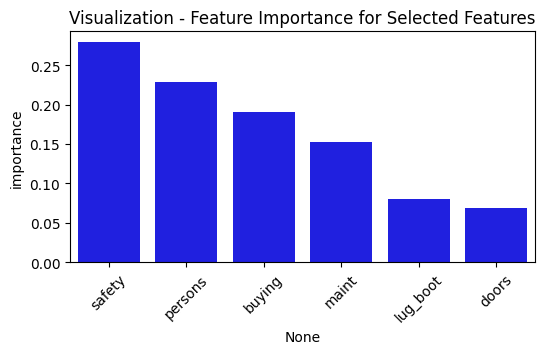

In [48]:
# Visualize feature importance for selected features
plt.figure(figsize=(6,3))
sns.barplot(x=feature_importances.index, y=feature_importances['importance'], color='blue')
plt.xticks(rotation=45)
plt.title('Visualization - Feature Importance for Selected Features')
plt.show()


In [44]:
X_train

array([[0., 0., 2., 0., 2., 1.],
       [1., 3., 0., 2., 1., 1.],
       [2., 3., 2., 2., 2., 2.],
       ...,
       [0., 3., 3., 1., 0., 1.],
       [2., 2., 2., 1., 0., 2.],
       [2., 1., 3., 2., 1., 1.]])

In [49]:
# Convert selected_features to a list if it's not already
selected_features = list(selected_features)

# Build model with selected features
rf_selected_features = RandomForestClassifier(random_state=42)
rf_selected_features.fit(X_train_df[selected_features], y_train)


RandomForestClassifier(random_state=42)

In [56]:
# Predictions
from sklearn.metrics import accuracy_score
y_pred = rf_selected_features.predict(X_test[:, feature_indices])
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9576107899807321
Confusion Matrix:
[[114   2   7   0]
 [  2  14   0   0]
 [  6   0 352   0]
 [  5   0   0  17]]

Classification Report:
              precision    recall  f1-score   support

         acc       0.90      0.93      0.91       123
        good       0.88      0.88      0.88        16
       unacc       0.98      0.98      0.98       358
       vgood       1.00      0.77      0.87        22

    accuracy                           0.96       519
   macro avg       0.94      0.89      0.91       519
weighted avg       0.96      0.96      0.96       519



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
